# import torch
import numpy as np
from utils.generate_csbm import *
from utils.train import *
from utils.utils import *
from models.models import *
from models.setup import *
import networkx as nx
import pickle

In [118]:
csbm1 = cSBM(N=40, d=25, mu=1, l=2, p=100)
G1 = nx.from_numpy_matrix(csbm1.A)
print (nx.is_connected(G1), csbm1.phi)
csbm1.generate_node_parameters()
csbm1.generate_node_data(120, "GC")

True 0.574124243317157


In [139]:
csbm2 = cSBM(N=40, d=5, mu=1, l=2, p=100)
G2 = nx.from_numpy_matrix(csbm2.A)
print (nx.is_connected(G2), csbm2.phi)
csbm2.generate_node_parameters()
csbm2.generate_node_data(120, "GC")

True 0.574124243317157


In [120]:
csbm3 = cSBM(N=40, d=15, mu=1, l=2, p=100)
G3 = nx.from_numpy_matrix(csbm3.A)
print (nx.is_connected(G3), csbm3.phi)
csbm3.generate_node_parameters()
csbm3.generate_node_data(120, "GC")

True 0.574124243317157


In [140]:
B = np.identity(40)/40 - np.ones((40,1))@np.ones((1,40))/(40**2)

In [141]:
L1 = np.array(nx.laplacian_matrix(G1).todense())
L2 = np.array(nx.laplacian_matrix(G2).todense())
L3 = np.array(nx.laplacian_matrix(G3).todense())

In [169]:
lm1 = np.linalg.eigh(B@np.linalg.pinv(L1))[0].max()

In [170]:
lm3 = np.linalg.eigh(B@np.linalg.pinv(L3))[0].max()

In [171]:
lm2 = np.linalg.eigh(B@np.linalg.pinv(L2))[0].max()

In [145]:
init_mlp = MLP(100, 64, 2, bias=False)

In [149]:
test_acc1 = []
for ith in range(20):
    csbm1.generate_node_data(120, "GC")
    A_tilde1 = calculate_Atilde(csbm1.A, K=10, alpha=0.9)
    server1 = set_up_GC(csbm1.Xs, csbm1.ys, init_mlp, A_tilde1, n_train=10, n_val=10, improved=False)
    tl, ta, vl, va = train_GC(server1, num_communication=150, batch_size=5, learning_rate=0.5, I=10,
                              gradient=True, noise=False, 
                              Print=False, print_time=10)
    test_acc1.append(server1.eval_test())
    print (ith)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [150]:
test_acc2 = []
for ith in range(20):
    csbm2.generate_node_data(120, "GC")
    A_tilde2 = calculate_Atilde(csbm2.A, K=10, alpha=0.9)
    server2 = set_up_GC(csbm2.Xs, csbm2.ys, init_mlp, A_tilde2, n_train=10, n_val=10, improved=False)
    tl2, ta2, vl2, va2 = train_GC(server2, num_communication=150, batch_size=5, learning_rate=0.5, I=10,
                              gradient=True, noise=False, 
                              Print=False, print_time=10)
    test_acc2.append(server2.eval_test())
    print (ith)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [151]:
test_acc3 = []
for ith in range(20):
    csbm3.generate_node_data(120, "GC")
    A_tilde3 = calculate_Atilde(csbm3.A, K=10, alpha=0.9)
    server3 = set_up_GC(csbm3.Xs, csbm3.ys, init_mlp, A_tilde3, n_train=10, n_val=10, improved=False)
    tl2, ta2, vl2, va2 = train_GC(server3, num_communication=150, batch_size=5, learning_rate=0.5, I=10,
                              gradient=True, noise=False, 
                              Print=False, print_time=10)
    test_acc3.append(server3.eval_test())
    print (ith)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [175]:
print (np.array(test_acc1)[:,1].mean(),np.array(test_acc3)[:,1].mean(), np.array(test_acc2)[:,1].mean())

0.9392625000000001 0.9236875000000001 0.8957875000000002


In [163]:
print (np.array(test_acc1)[:,1].std(),np.array(test_acc3)[:,1].std(), np.array(test_acc2)[:,1].std())

0.004337680111534334 0.004570882710155681 0.01726073488441325


In [2]:
import pandas as pd

In [173]:
c = [lm1, lm3, lm2]
tams = [np.array(test_acc1)[:,1].mean(),np.array(test_acc3)[:,1].mean(), np.array(test_acc2)[:,1].mean()]
tasds = [np.array(test_acc1)[:,1].std(),np.array(test_acc3)[:,1].std(), np.array(test_acc2)[:,1].std()]
rows = [c, tams, tasds]

In [178]:
results = pd.DataFrame(rows).T

In [179]:
results

,0,1,2
0,0.001762,0.939263,0.004338
1,0.004170,0.923688,0.004571
2,0.075246,0.895788,0.017261


In [15]:
df = pd.read_csv("connectivity_results.csv")
df

,0,1,2
0,0.001762,0.939263,0.004338
1,0.004170,0.923687,0.004571
2,0.075246,0.895788,0.017261


In [9]:
import matplotlib.pyplot as plt

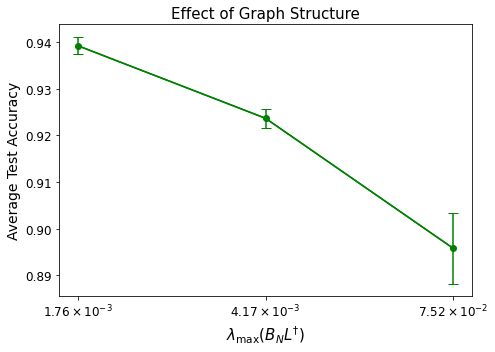

In [121]:
fig,ax = plt.subplots(1,1, figsize=(7,5))
x = [1,2,3]
y = df.iloc[:,1]
yerr = 1.96*df.iloc[:,2]/np.sqrt(20)
subs = [r"$1.76\times 10^{-3}$", r"$4.17\times 10^{-3}$", r"$7.52\times 10^{-2}$"]
plt.errorbar(x, y, yerr, marker="o", markersize=6, capsize=5, color="green")
plt.plot(x, y, color="green")
plt.xticks([1, 2, 3],[r"$1.76\times 10^{-3}$", r"$4.17\times 10^{-3}$", r"$7.52\times 10^{-2}$"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$\lambda_{\max} (B_N L^{\dagger})$", fontsize=15)
plt.ylabel("Average Test Accuracy", fontsize=14)
plt.title("Effect of Graph Structure", fontsize=15)
plt.tight_layout()
plt.savefig("connectivity.jpeg")

In [25]:
df.iloc[:,0]

0    0.001762
1    0.004170
2    0.075246
Name: 0, dtype: float64

In [12]:
df.iloc[2]

0    0.075246
1    0.895788
2    0.017261
Name: 2, dtype: float64